In [5]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Download necessary NLTK resources (run this once if you haven't already)
try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')

In [6]:
def load_data(train_file):
    try:
        df = pd.read_csv(train_file)
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {train_file}")
        return None

train_file_path = '/kaggle/input/rural-kenyan-healthcare-challenge/train.csv' 
df = load_data(train_file_path)

if df is not None:
    print("Data loaded successfully!")
else:
    print("Data loading failed. Please check the file path.")

Data loaded successfully!


In [7]:
if df is not None:
    print("--- Basic Information ---")
    print(f"Number of rows: {len(df)}")
    print(f"Number of columns: {df.shape[1]}")
    print(f"Column names: {df.columns.tolist()}")
    print("\n--- First 5 rows ---")
    print(df.head())
    print("\n--- Data Types ---")
    print(df.info())

--- Basic Information ---
Number of rows: 400
Number of columns: 12
Column names: ['Master_Index', 'County', 'Health level', 'Years of Experience', 'Prompt', 'Nursing Competency', 'Clinical Panel', 'Clinician', 'GPT4.0', 'LLAMA', 'GEMINI', 'DDX SNOMED']

--- First 5 rows ---
  Master_Index       County                            Health level  \
0     ID_VBWWP  uasin gishu  sub county hospitals and nursing homes   
1     ID_XMBBY  uasin gishu             national referral hospitals   
2     ID_JZNZW       kiambu  sub county hospitals and nursing homes   
3     ID_QOQTK  uasin gishu             national referral hospitals   
4     ID_ZFJBM  uasin gishu             national referral hospitals   

   Years of Experience                                             Prompt  \
0                 18.0  i am a nurse with 18 years of experience in ge...   
1                 17.0  i am a nurse with 17 years of experience in ge...   
2                 12.0  i am a nurse with 12 years of experience i


--- Analyzing Clinician Responses ---
Average response length: 695.98 characters
Minimum response length: 151 characters
Maximum response length: 2049 characters


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


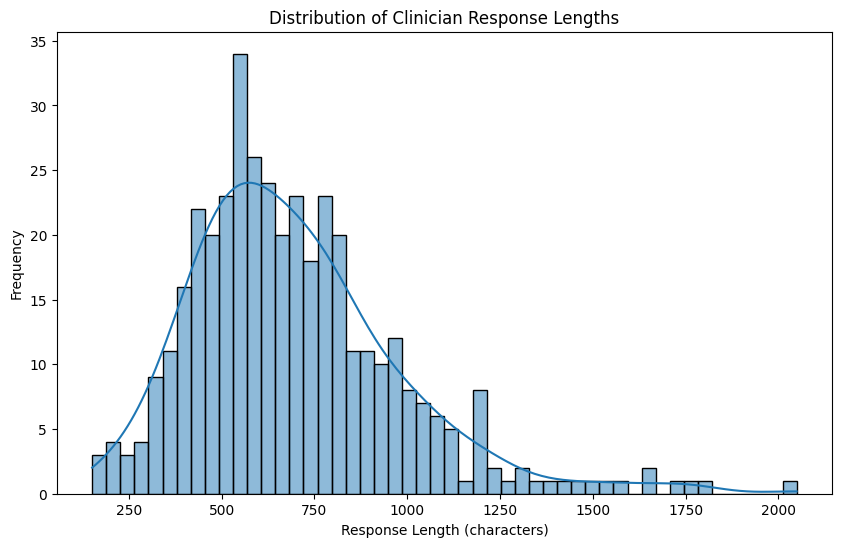


--- Most Common Words (excluding stopwords) ---
patient: 453
blood: 397
old: 331
summary: 326
management: 315
year: 271
diagnosis: 231
pain: 226
investigations: 196
2: 179
give: 178
iv: 168
administer: 164
check: 155
vitals: 153
1: 143
history: 143
3: 137
antibiotics: 125
monitor: 121


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


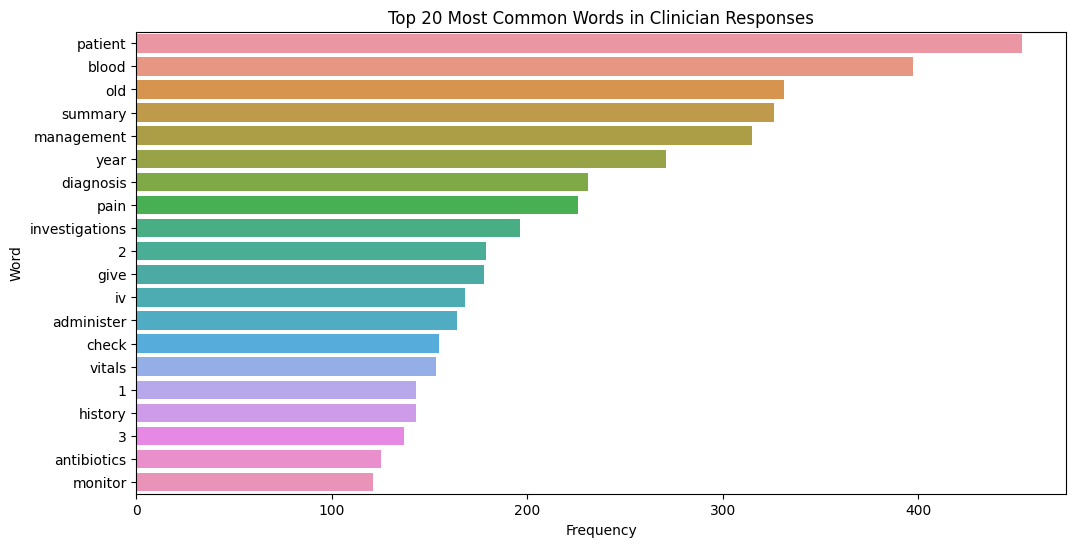

In [8]:
if df is not None and 'Clinician' in df.columns:
    responses = df['Clinician'].astype(str)
    print("\n--- Analyzing Clinician Responses ---")

    # Response Length Distribution
    response_lengths = responses.apply(len)
    print(f"Average response length: {response_lengths.mean():.2f} characters")
    print(f"Minimum response length: {response_lengths.min()} characters")
    print(f"Maximum response length: {response_lengths.max()} characters")

    plt.figure(figsize=(10, 6))
    sns.histplot(response_lengths, bins=50, kde=True)
    plt.title('Distribution of Clinician Response Lengths')
    plt.xlabel('Response Length (characters)')
    plt.ylabel('Frequency')
    plt.show()

    # Word Tokenization and Frequency
    stop_words = set(stopwords.words('english'))
    all_words = []
    for response in responses:
        # Apply the same preprocessing as for ROUGE (lowercase, remove punctuation, split by space)
        processed_response = response.lower()
        processed_response = ''.join(c if c.isalnum() or c.isspace() else '' for c in processed_response)
        processed_response = processed_response.replace('\n', ' ')
        tokens = word_tokenize(processed_response)
        all_words.extend([word for word in tokens if word.isalnum() and word not in stop_words])

    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(20)
    print("\n--- Most Common Words (excluding stopwords) ---")
    for word, count in most_common_words:
        print(f"{word}: {count}")

    # Visualize most common words
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title('Top 20 Most Common Words in Clinician Responses')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()


--- Analyzing Prompts ---
Average prompt length: 542.29 characters
Minimum prompt length: 227 characters
Maximum prompt length: 1365 characters


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


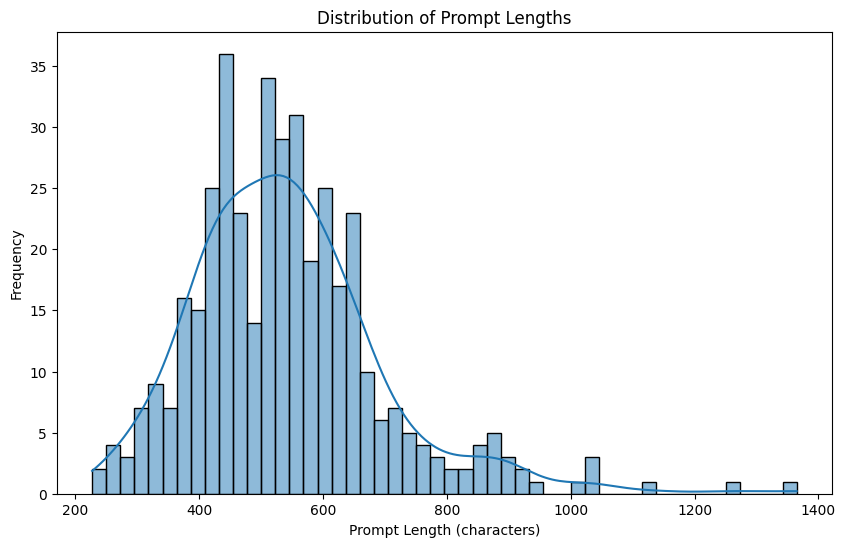


--- Most Common Words in Prompts (excluding stopwords) ---
county: 544
nursing: 420
nurse: 409
working: 402
kenya: 400
patient: 393
years: 391
old: 309
experience: 302
general: 297
hospitals: 265
uasin: 247
gishu: 247
year: 226
questions: 203
history: 156
management: 152
bp: 146
done: 146
pain: 143


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


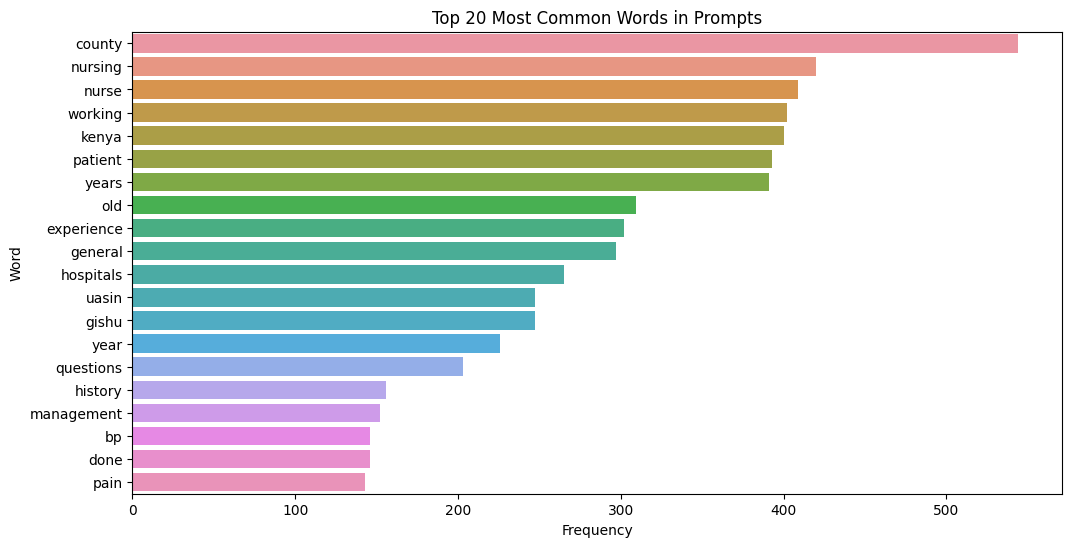

In [9]:
if df is not None and 'Prompt' in df.columns:
    prompts = df['Prompt'].astype(str)
    print("\n--- Analyzing Prompts ---")

    # Prompt Length Distribution
    prompt_lengths = prompts.apply(len)
    print(f"Average prompt length: {prompt_lengths.mean():.2f} characters")
    print(f"Minimum prompt length: {prompt_lengths.min()} characters")
    print(f"Maximum prompt length: {prompt_lengths.max()} characters")

    plt.figure(figsize=(10, 6))
    sns.histplot(prompt_lengths, bins=50, kde=True)
    plt.title('Distribution of Prompt Lengths')
    plt.xlabel('Prompt Length (characters)')
    plt.ylabel('Frequency')
    plt.show()

    # Word Frequency in Prompts
    stop_words = set(stopwords.words('english'))
    all_prompt_words = []
    for prompt in prompts:
        processed_prompt = prompt.lower()
        processed_prompt = ''.join(c if c.isalnum() or c.isspace() else '' for c in processed_prompt)
        processed_prompt = processed_prompt.replace('\n', ' ')
        tokens = word_tokenize(processed_prompt)
        all_prompt_words.extend([word for word in tokens if word.isalnum() and word not in stop_words])

    prompt_word_counts = Counter(all_prompt_words)
    most_common_prompt_words = prompt_word_counts.most_common(20)
    print("\n--- Most Common Words in Prompts (excluding stopwords) ---")
    for word, count in most_common_prompt_words:
        print(f"{word}: {count}")

    # Visualize most common prompt words
    words, counts = zip(*most_common_prompt_words)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title('Top 20 Most Common Words in Prompts')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

In [10]:
if df is not None:
    categorical_cols = ['County', 'Health level', 'Nursing Competency', 'Clinical Panel']
    for col in categorical_cols:
        if col in df.columns:
            print(f"\n--- Analyzing Feature: {col} ---")
            value_counts = df[col].value_counts(dropna=False)  # Get value counts, including NaN
            print(value_counts)

            # Calculate percentages
            percentages = (df[col].value_counts(dropna=False, normalize=True) * 100).round(2)
            print("\n--- Percentages ---")
            print(percentages)


--- Analyzing Feature: County ---
County
uasin gishu         247
kakamega             83
kiambu               60
elgeiyo marakwet      6
bungoma               4
Name: count, dtype: int64

--- Percentages ---
County
uasin gishu         61.75
kakamega            20.75
kiambu              15.00
elgeiyo marakwet     1.50
bungoma              1.00
Name: proportion, dtype: float64

--- Analyzing Feature: Health level ---
Health level
sub county hospitals and nursing homes    131
national referral hospitals               125
health centres                             74
dispensaries and private clinics           54
county hospitals                            9
community health centers                    6
health centers                              1
Name: count, dtype: int64

--- Percentages ---
Health level
sub county hospitals and nursing homes    32.75
national referral hospitals               31.25
health centres                            18.50
dispensaries and private clinics         

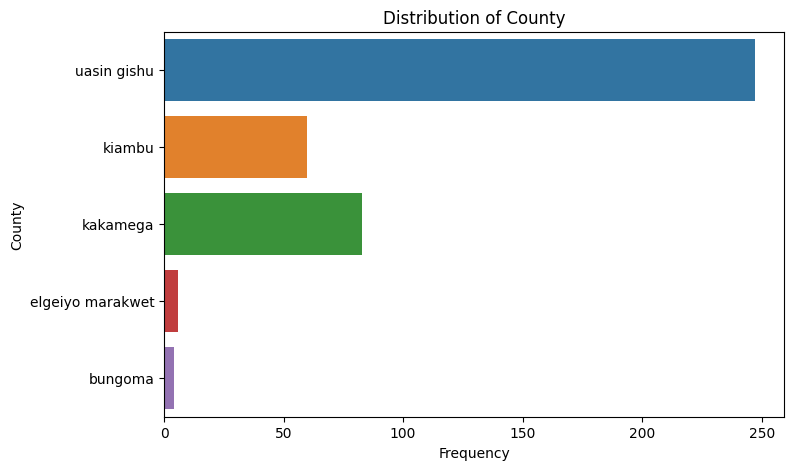

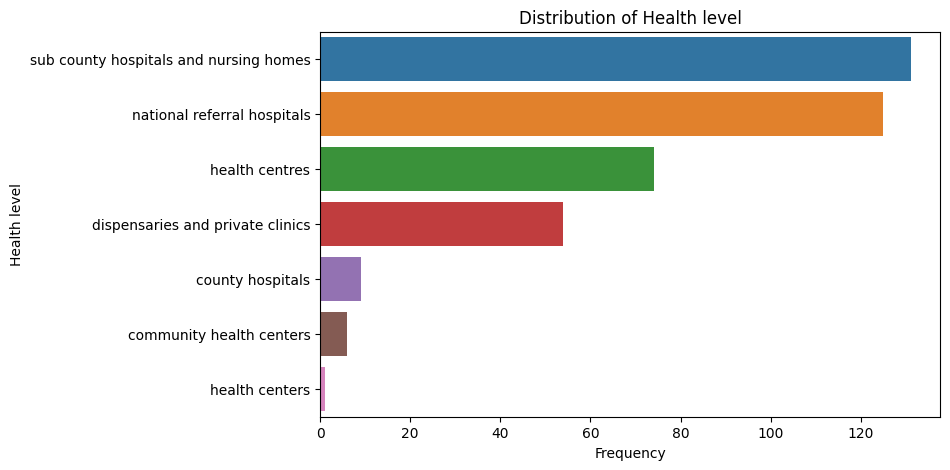

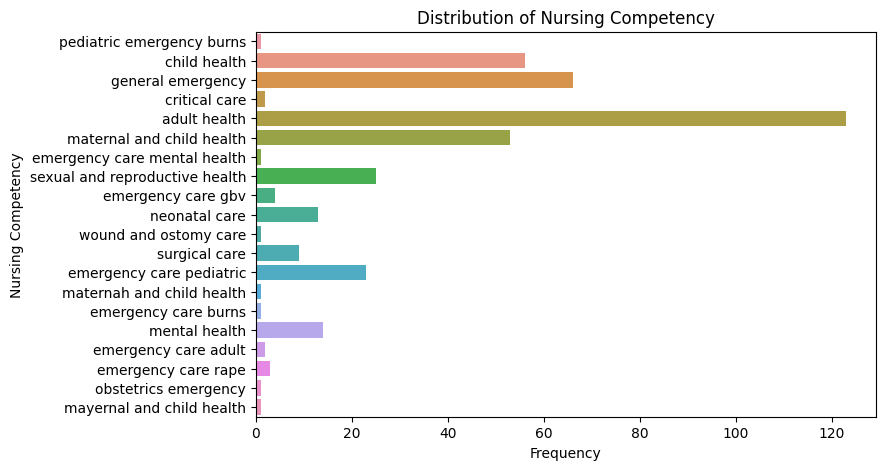

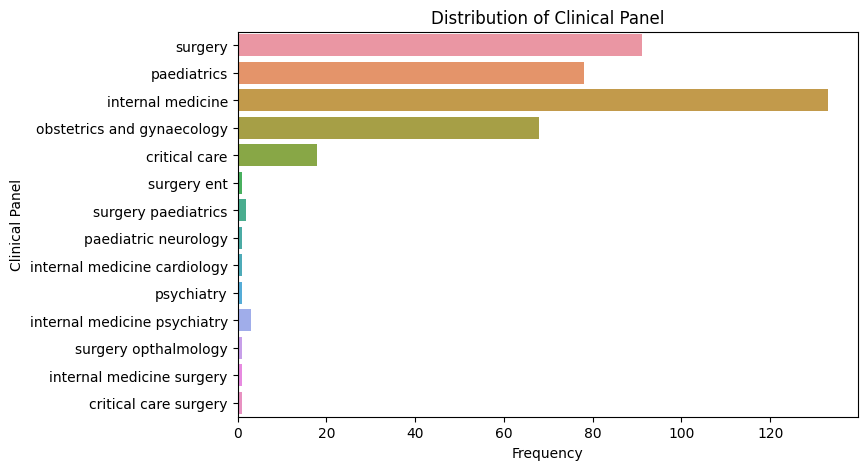

In [11]:
#This code is already in cell 6
if df is not None:
    categorical_cols = ['County', 'Health level', 'Nursing Competency', 'Clinical Panel']
    for col in categorical_cols:
        if col in df.columns:
            #print(f"\n--- Analyzing Feature: {col} ---") #already printed above
            #print(df[col].value_counts(dropna=False))  # Show counts including NaN
            plt.figure(figsize=(8, 5))
            sns.countplot(data=df, y=col)
            plt.title(f'Distribution of {col}')
            plt.ylabel(col)
            plt.xlabel('Frequency')
            plt.show()

In [12]:
if df is not None and 'Nursing Competency' in df.columns:
    df['Nursing Competency'] = df['Nursing Competency'].str.lower()  # Ensure all are lowercase
    df['Nursing Competency'] = df['Nursing Competency'].replace(
        ['maternah and child health', 'mayernal and child health'],
        'maternal and child health'
    )

    # Verify the correction
    print("\n--- Nursing Competency: After Spelling Correction ---")
    print(df['Nursing Competency'].value_counts(dropna=False))


--- Nursing Competency: After Spelling Correction ---
Nursing Competency
adult health                      123
general emergency                  66
child health                       56
maternal and child health          55
sexual and reproductive health     25
emergency care pediatric           23
mental health                      14
neonatal care                      13
surgical care                       9
emergency care gbv                  4
emergency care rape                 3
emergency care adult                2
critical care                       2
pediatric emergency burns           1
emergency care mental health        1
wound and ostomy care               1
emergency care burns                1
obstetrics emergency                1
Name: count, dtype: int64


In [13]:
def handle_rare_categories(df, col, threshold=0.01):
    if col not in df.columns:
        return df

    counts = df[col].value_counts(normalize=True)
    rare_categories = counts[counts < threshold].index.tolist()

    if rare_categories:
        df[col] = df[col].apply(lambda x: 'Other' if x in rare_categories else x)
        print(f"\n--- Handled Rare Categories in: {col} ---")
        print(df[col].value_counts(dropna=False))  # Show counts after handling
    else:
        print(f"\n--- No Rare Categories to Handle in: {col} ---")

    return df


if df is not None:
    df = handle_rare_categories(df, 'County', threshold=0.01)
    df = handle_rare_categories(df, 'Health level', threshold=0.01)

    #Custom handling for Nursing Competency
    if 'Nursing Competency' in df.columns:
      df = df.copy() # To avoid SettingWithCopyWarning
      df['Nursing Competency'] = df['Nursing Competency'].replace(
          [
              'emergency care gbv', 'emergency care rape',
              'emergency care adult', 'emergency care pediatric',
              'emergency care mental health', 'emergency care burns',
              'obstetrics emergency', 'pediatric emergency burns'
          ],
          'emergency care'
      )
      df = handle_rare_categories(df, 'Nursing Competency', threshold=0.01)

    df = handle_rare_categories(df, 'Clinical Panel', threshold=0.01)


--- No Rare Categories to Handle in: County ---

--- Handled Rare Categories in: Health level ---
Health level
sub county hospitals and nursing homes    131
national referral hospitals               125
health centres                             74
dispensaries and private clinics           54
county hospitals                            9
community health centers                    6
Other                                       1
Name: count, dtype: int64

--- Handled Rare Categories in: Nursing Competency ---
Nursing Competency
adult health                      123
general emergency                  66
child health                       56
maternal and child health          55
emergency care                     36
sexual and reproductive health     25
mental health                      14
neonatal care                      13
surgical care                       9
Other                               3
Name: count, dtype: int64

--- Handled Rare Categories in: Clinical Panel ---
Clinica

In [14]:
def handle_missing_values(df, cols):
    for col in cols:
        if col in df.columns:
            print(f"\n--- Checking for Missing Values in: {col} ---")
            print(f"Number of missing values in {col}: {df[col].isnull().sum()}")

            if df[col].isnull().sum() > 0:
                # Handle missing values (example: impute with the most frequent value)
                most_frequent = df[col].mode()[0]
                df[col] = df[col].fillna(most_frequent)
                print(f"Missing values in {col} imputed with: {most_frequent}")
            else:
                print(f"No missing values found in {col}")
    return df


if df is not None:
    categorical_cols = ['County', 'Health level', 'Nursing Competency', 'Clinical Panel']
    df = handle_missing_values(df, categorical_cols)


--- Checking for Missing Values in: County ---
Number of missing values in County: 0
No missing values found in County

--- Checking for Missing Values in: Health level ---
Number of missing values in Health level: 0
No missing values found in Health level

--- Checking for Missing Values in: Nursing Competency ---
Number of missing values in Nursing Competency: 0
No missing values found in Nursing Competency

--- Checking for Missing Values in: Clinical Panel ---
Number of missing values in Clinical Panel: 0
No missing values found in Clinical Panel



--- Crosstabulation: County vs. Health level ---
Health level      Other  community health centers  county hospitals  \
County                                                                
bungoma               0                         0                 0   
elgeiyo marakwet      0                         0                 6   
kakamega              0                         0                 1   
kiambu                0                         0                 0   
uasin gishu           1                         6                 2   

Health level      dispensaries and private clinics  health centres  \
County                                                               
bungoma                                          0               0   
elgeiyo marakwet                                 0               0   
kakamega                                        29              27   
kiambu                                          12               7   
uasin gishu                     

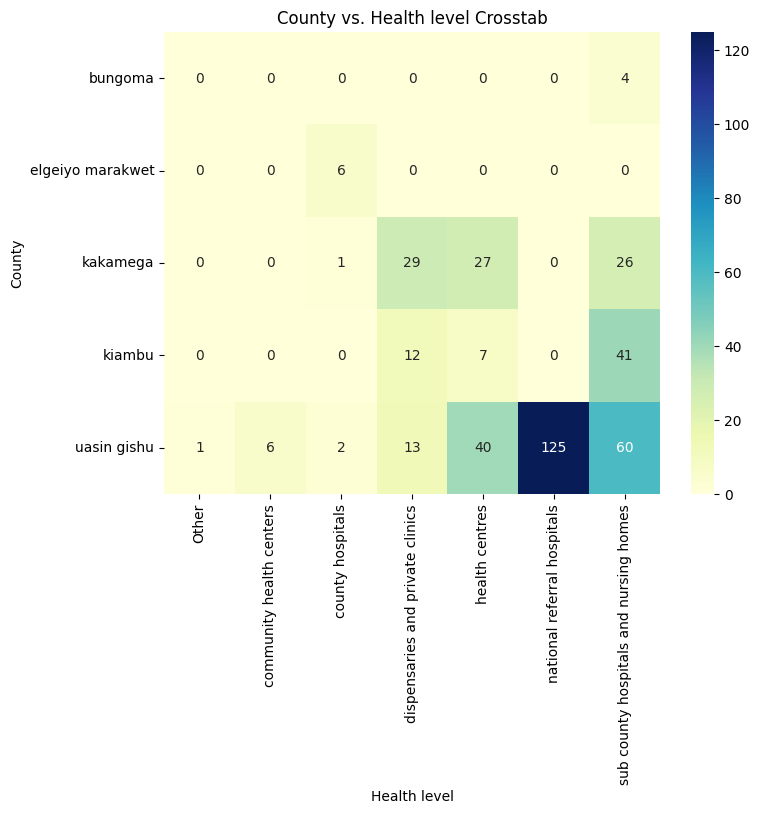


--- Crosstabulation: County vs. Nursing Competency ---
Nursing Competency  Other  adult health  child health  emergency care  \
County                                                                  
bungoma                 0             1             2               0   
elgeiyo marakwet        0             2             0               1   
kakamega                1            15            14               9   
kiambu                  0            13             9               1   
uasin gishu             2            92            31              25   

Nursing Competency  general emergency  maternal and child health  \
County                                                             
bungoma                             0                          0   
elgeiyo marakwet                    2                          0   
kakamega                           15                         16   
kiambu                             12                         16   
uasin gishu             

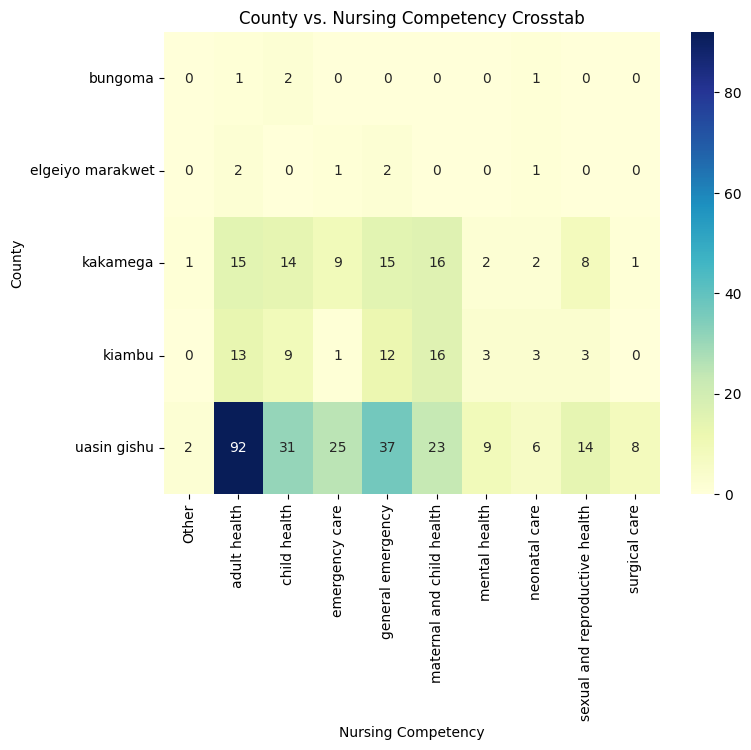


--- Crosstabulation: County vs. Clinical Panel ---
Clinical Panel    Other  critical care  internal medicine  \
County                                                      
bungoma               1              0                  1   
elgeiyo marakwet      0              0                  2   
kakamega              0              4                 25   
kiambu                3              2                 17   
uasin gishu           8             12                 88   

Clinical Panel    obstetrics and gynaecology  paediatrics  surgery  
County                                                              
bungoma                                    0            2        0  
elgeiyo marakwet                           0            0        4  
kakamega                                  23           15       16  
kiambu                                    12           19        7  
uasin gishu                               33           42       64  

Chi-square test:
  Chi2 Statistic: 4

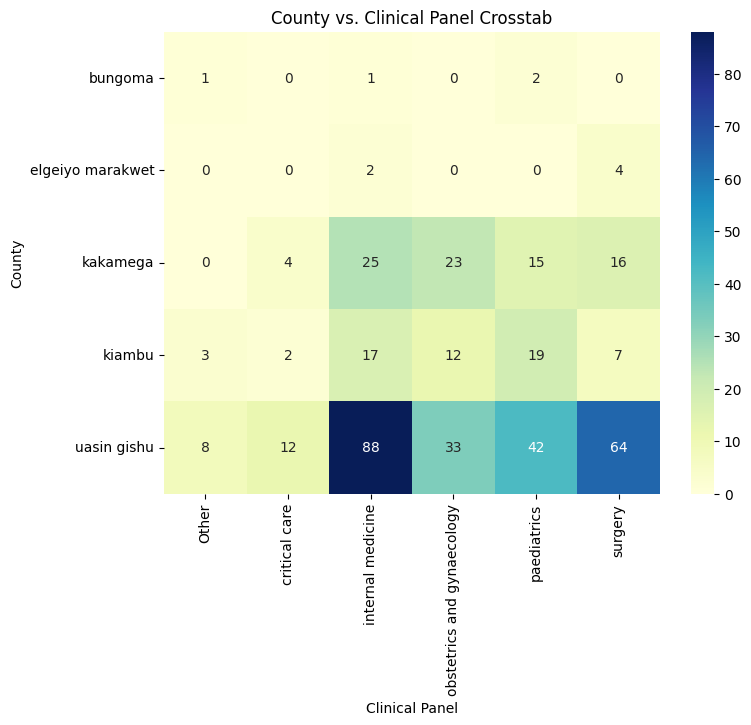


--- Crosstabulation: Health level vs. Nursing Competency ---
Nursing Competency                      Other  adult health  child health  \
Health level                                                                
Other                                       0             1             0   
community health centers                    0             3             1   
county hospitals                            0             2             0   
dispensaries and private clinics            0            14             9   
health centres                              0            26            14   
national referral hospitals                 2            37            17   
sub county hospitals and nursing homes      1            40            15   

Nursing Competency                      emergency care  general emergency  \
Health level                                                                
Other                                                0                  0   
community hea

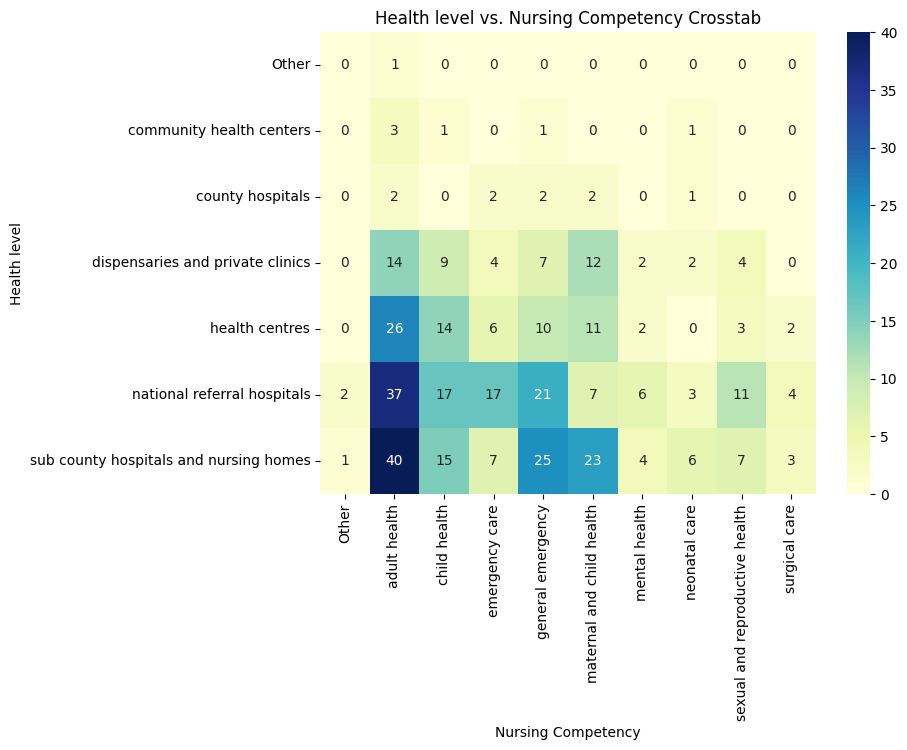


--- Crosstabulation: Health level vs. Clinical Panel ---
Clinical Panel                          Other  critical care  \
Health level                                                   
Other                                       0              0   
community health centers                    0              1   
county hospitals                            0              0   
dispensaries and private clinics            2              1   
health centres                              1              6   
national referral hospitals                 7              5   
sub county hospitals and nursing homes      2              5   

Clinical Panel                          internal medicine  \
Health level                                                
Other                                                   1   
community health centers                                2   
county hospitals                                        2   
dispensaries and private clinics                       18   

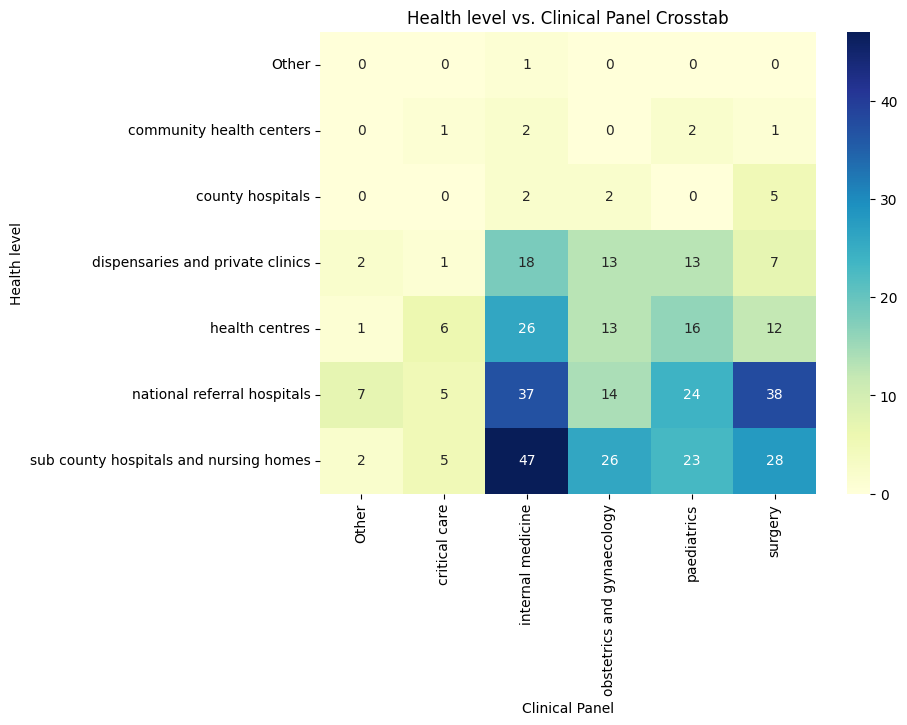


--- Crosstabulation: Nursing Competency vs. Clinical Panel ---
Clinical Panel                  Other  critical care  internal medicine  \
Nursing Competency                                                        
Other                               0              0                  1   
adult health                        1              4                 81   
child health                        3              1                  3   
emergency care                      1              4                  9   
general emergency                   5              9                 25   
maternal and child health           0              0                  1   
mental health                       2              0                  8   
neonatal care                       0              0                  0   
sexual and reproductive health      0              0                  2   
surgical care                       0              0                  3   

Clinical Panel                  obs

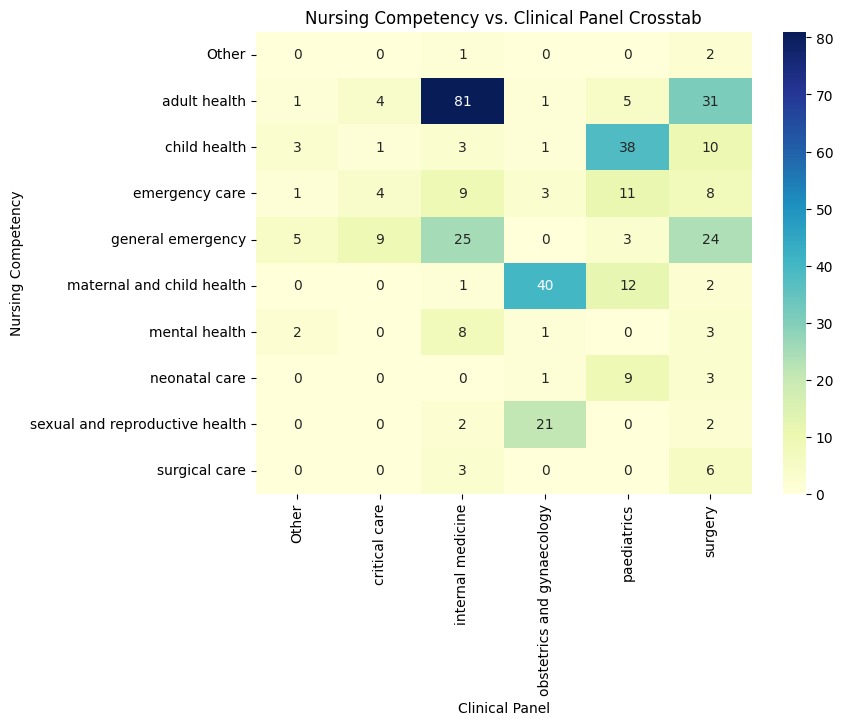

In [15]:
def explore_categorical_relationships(df, categorical_cols):
    from scipy.stats import chi2_contingency  # Import here to avoid unnecessary dependency

    if df is not None:
        for i in range(len(categorical_cols)):
            for j in range(i + 1, len(categorical_cols)):  # Avoid redundant comparisons
                col1 = categorical_cols[i]
                col2 = categorical_cols[j]
                if col1 in df.columns and col2 in df.columns:
                    print(f"\n--- Crosstabulation: {col1} vs. {col2} ---")
                    crosstab = pd.crosstab(df[col1], df[col2], dropna=False)  # Keep NaN in crosstab
                    print(crosstab)

                    # Chi-square test (for statistical significance)
                    try:
                        chi2, p, dof, expected = chi2_contingency(crosstab)
                        print(f"\nChi-square test:")
                        print(f"  Chi2 Statistic: {chi2:.2f}")
                        print(f"  P-value: {p:.3f}")
                        print(f"  Degrees of Freedom: {dof}")
                        if p < 0.05:
                            print("  The variables are likely dependent (associated).")
                        else:
                            print("  The variables are likely independent (not associated).")
                    except ValueError as e:
                        print(f"  Chi-square test could not be performed: {e}")

                    # Visualization (optional, for smaller crosstabs)
                    if crosstab.shape[0] <= 10 and crosstab.shape[1] <= 10:  # Adjust as needed
                        plt.figure(figsize=(8, 6))
                        sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt="d")
                        plt.title(f'{col1} vs. {col2} Crosstab')
                        plt.xlabel(col2)
                        plt.ylabel(col1)
                        plt.show()


if df is not None:
    categorical_cols = ['County', 'Health level', 'Nursing Competency', 'Clinical Panel']
    explore_categorical_relationships(df, categorical_cols)

In [16]:
def encode_categorical_features(df, categorical_cols):
    if df is not None:
        for col in categorical_cols:
            if col in df.columns:
                df = pd.get_dummies(df, columns=[col], prefix=[col], dummy_na=False)
                print(f"\n--- Encoded Feature: {col} ---")
                print(f"New columns: {', '.join([c for c in df.columns if c.startswith(col + '_')])}")
    return df


if df is not None:
    categorical_cols = ['County', 'Health level', 'Nursing Competency', 'Clinical Panel']
    df_encoded = encode_categorical_features(df.copy(), categorical_cols)  # Encode a copy to keep the original

    print("\n--- Data after Encoding ---")
    print(df_encoded.head())
    print(df_encoded.info())


--- Encoded Feature: County ---
New columns: County_bungoma, County_elgeiyo marakwet, County_kakamega, County_kiambu, County_uasin gishu

--- Encoded Feature: Health level ---
New columns: Health level_Other, Health level_community health centers, Health level_county hospitals, Health level_dispensaries and private clinics, Health level_health centres, Health level_national referral hospitals, Health level_sub county hospitals and nursing homes

--- Encoded Feature: Nursing Competency ---
New columns: Nursing Competency_Other, Nursing Competency_adult health, Nursing Competency_child health, Nursing Competency_emergency care, Nursing Competency_general emergency, Nursing Competency_maternal and child health, Nursing Competency_mental health, Nursing Competency_neonatal care, Nursing Competency_sexual and reproductive health, Nursing Competency_surgical care

--- Encoded Feature: Clinical Panel ---
New columns: Clinical Panel_Other, Clinical Panel_critical care, Clinical Panel_internal